In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generating Dataset

In [3]:
X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)

In [4]:
print(X.shape,Y.shape)

(500, 2) (500,)


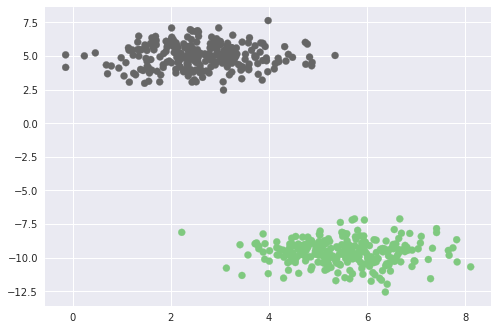

In [5]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

# Model


In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

# Implement perceptron learning algorithm
## Learn the weights
## Reduce the loss

In [7]:
def predict(X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary cross entropy"""
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)- (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    
    m=X.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

def Train(X,Y,learning_rate=0.5,maxEpochs=100):
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    #Init weights 0
    weights=np.zeros((X.shape[1]))
    
    #Iterate over all epochs
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights

In [14]:
weights=Train(X,Y,learning_rate=0.6,maxEpochs=200)

Epoch 0 Loss 0.0002
Epoch 10 Loss 0.0002
Epoch 20 Loss 0.0002
Epoch 30 Loss 0.0002
Epoch 40 Loss 0.0002
Epoch 50 Loss 0.0002
Epoch 60 Loss 0.0002
Epoch 70 Loss 0.0002
Epoch 80 Loss 0.0002
Epoch 90 Loss 0.0002
Epoch 100 Loss 0.0002
Epoch 110 Loss 0.0002
Epoch 120 Loss 0.0001
Epoch 130 Loss 0.0001
Epoch 140 Loss 0.0001
Epoch 150 Loss 0.0001
Epoch 160 Loss 0.0001
Epoch 170 Loss 0.0001
Epoch 180 Loss 0.0001
Epoch 190 Loss 0.0001


In [22]:
def getPrediction(X_test,weights,labels=True):
    if X_test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
    probs=predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>0.5]=1
        return labels
    

In [23]:
x1=np.linspace(0,8,10)
print(x1)
x2= -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[0.         0.88888889 1.77777778 2.66666667 3.55555556 4.44444444
 5.33333333 6.22222222 7.11111111 8.        ]
[-0.00835835  0.14558735  0.29953304  0.45347874  0.60742444  0.76137013
  0.91531583  1.06926152  1.22320722  1.37715291]


In [24]:
weights

array([ 0.01879411, -0.3894228 ,  2.24854356])

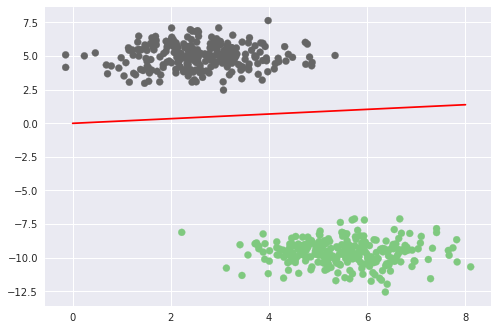

In [25]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

# Accuracy


In [27]:
Y_pred=getPrediction(X,weights,labels=True)
print(Y_pred)

[0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.

In [29]:
training_accuracy=np.sum(Y_pred==Y)/Y.shape[0]
print(training_accuracy)

1.0


# 100% Accuracy